# FutBot - Preprocesamiento de datos

### Importacion

In [44]:
import numpy as np
import matplotlib.pyplot as plt
import unicodedata
import pandas as pd
import seaborn as sns
import unicodedata

In [ ]:
# Como el dataset original tiene muchas columnas, seteamos pandas para que se vean todas las columnas existentes en el dataset
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

En caso de ya tener guardado jugadores_reducido.csv, ir a la seccion "Limpieza de datos - Liga Argentina"

In [ ]:
# Importacion de datos
csv_path = './data/male_players.csv'
df = pd.read_csv(csv_path)
df.head()

C:\Users\rocio\AppData\Local\Temp\ipykernel_3028\2570138925.py:3: DtypeWarning: Columns (108) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(csv_path)


,player_id,player_url,fifa_version,fifa_update,fifa_update_date,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,dob,height_cm,weight_kg,league_id,league_name,league_level,club_team_id,club_name,club_position,club_jersey_number,club_loaned_from,club_joined_date,club_contract_valid_until_year,nationality_id,nationality_name,nation_team_id,nation_position,nation_jersey_number,preferred_foot,weak_foot,skill_moves,international_reputation,work_rate,body_type,real_face,release_clause_eur,player_tags,player_traits,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk,player_face_url
0,158023,/player/158023/lionel-messi/230009,23,9,2023-01-13,L. Messi,Lionel Andrés Messi Cuccittini,RW,91,91,54000000.0,195000.0,35,1987-06-24,169,67,16.0,Ligue 1,1.0,73.0,Paris Saint Germain,RS,30.0,NaN,2021-08-10,2023.0,52,Argentina,1369.0,RW,10.0,Left,4,4,5,Low/Low,Unique,Yes,99900000.0,"#Dribbler, #Distance Shooter, #FK Specialist, #Acrobat, #Clinical Finisher, #Complete Forward","Finesse Shot, Long Shot Taker (AI), Playmaker (AI), Outside Foot Shot, Chip Shot (AI), Technical Dribbler (AI)",81.0,89.0,90.0,94.0,34.0,64.0,84,90,70,91,88,95,93,93,90,93,87,76,91,92,95,86,68,70,68,91,44,40,93,94,75,96.0,20,35,24,6,11,15,14,8,NaN,87+3,87+3,87+3,90,91,91,91,90,92-1,92-1,92-1,89+2,85+3,85+3,85+3,89+2,64+3,63+3,63+3,63+3,64+3,59+3,50+3,50+3,50+3,59+3,19+3,https://cdn.sofifa.net/players/158/023/23_120.png
1,165153,/player/165153/karim-benzema/230009,23,9,2023-01-13,K. Benzema,Karim Benzema,"CF, ST",91,91,64000000.0,450000.0,34,1987-12-19,185,81,53.0,La Liga,1.0,243.0,Real Madrid,CF,9.0,NaN,2009-07-09,2023.0,18,France,NaN,NaN,NaN,Right,4,4,4,Medium/Medium,Normal (170-185),Yes,131200000.0,"#Poacher, #Clinical Finisher","Leadership, Finesse Shot, Playmaker (AI), Outside Foot Shot, Team Player",80.0,88.0,83.0,87.0,39.0,78.0,75,92,90,89,88,87,82,73,76,91,79,80,78,92,72,87,79,82,82,80,63,39,92,89,84,90.0,43,24,18,13,11,5,5,7,NaN,89+2,89+2,89+2,87,89,89,89,87,88+3,88+3,88+3,86+3,81+3,81+3,81+3,86+3,64+3,64+3,64+3,64+3,64+3,60+3,55+3,55+3,55+3,60+3,18+3,https://cdn.sofifa.net/players/165/153/23_120.png
2,188545,/player/188545/robert-lewandowski/230009,23,9,2023-01-13,R. Lewandowski,Robert Lewandowski,ST,91,91,84000000.0,420000.0,33,1988-08-21,185,81,53.0,La Liga,1.0,241.0,FC Barcelona,ST,9.0,NaN,2022-07-18,2025.0,37,Poland,1353.0,ST,9.0,Right,4,4,5,High/Medium,Unique,Yes,172200000.0,"#Aerial Threat, #Distance Shooter, #Clinical Finisher, #Complete Forward","Solid Player, Finesse Shot, Outside Foot Shot, Chip Shot (AI)",75.0,91.0,79.0,86.0,44.0,83.0,71,94,91,84,89,85,79,85,70,89,76,75,77,93,82,91,85,76,87,84,81,49,94,81,90,88.0,35,42,19,15,6,12,8,10,NaN,89+2,89+2,89+2,85,88,88,88,85,85+3,85+3,85+3,83+3,80+3,80+3,80+3,83+3,64+3,66+3,66+3,66+3,64+3,61+3,60+3,60+3,60+3,61+3,19+3,https://cdn.sofifa.net/players/188/545/23_120.png
3,192985,/player/192985/kevin-de-bruyne/230009,23,9,2023-01-13,K. De Bruyne,Kevin De Bruyne,"CM, CAM",91,91,107500000.0,350000.0,31,1991-06-28,181,75,13.0,Premier League,1.0,10.0,Manchester City,RCM,17.0,NaN,2015-08-30,2025.0,7,Belgium,1325.0,RF,7.0,Right,5,4,4,High/Medium,Unique,Yes,198900000.0,"#Dribbler, #Playmaker, #Distance Shooter, #Crosser, #Compl

Existen columnas que son propias del juego FIFA, y que para nuestro analisis no son utiles, por lo que decidimos ignorarlas en un nuevo dataset

In [6]:
# Seleccion de columnas a utilizar
columnas_utiles = ['player_url', 'fifa_version', 'fifa_update','long_name', 'player_positions', 'dob',
                   'height_cm', 'weight_kg', 'league_name', 'league_level', 'club_name', 'club_position', 'club_jersey_number',
                   'nationality_name', 'nation_position', 'nation_jersey_number', 'preferred_foot']

df = df[columnas_utiles].copy() 

In [7]:
df.head()

,player_url,fifa_version,fifa_update,long_name,player_positions,dob,height_cm,weight_kg,league_name,league_level,club_name,club_position,club_jersey_number,nationality_name,nation_position,nation_jersey_number,preferred_foot
0,/player/158023/lionel-messi/230009,23,9,Lionel Andrés Messi Cuccittini,RW,1987-06-24,169,67,Ligue 1,1.0,Paris Saint Germain,RS,30.0,Argentina,RW,10.0,Left
1,/player/165153/karim-benzema/230009,23,9,Karim Benzema,"CF, ST",1987-12-19,185,81,La Liga,1.0,Real Madrid,CF,9.0,France,NaN,NaN,Right
2,/player/188545/robert-lewandowski/230009,23,9,Robert Lewandowski,ST,1988-08-21,185,81,La Liga,1.0,FC Barcelona,ST,9.0,Poland,ST,9.0,Right
3,/player/192985/kevin-de-bruyne/230009,23,9,Kevin De Bruyne,"CM, CAM",1991-06-28,181,75,Premier League,1.0,Manchester City,RCM,17.0,Belgium,RF,7.0,Right
4,/player/231747/kylian-mbappe/230009,23,9,Kylian Mbappé Lottin,"ST, LW",1998-12-20,182,73,Ligue 1,1.0,Paris Saint Germain,LS,7.0,France,LW,10.0,Right


In [ ]:
# Guardamos el dataset reducido para no tener que cargar el original cada vez
df.to_csv("jugadores_reducido.csv", index=False)

### Limpieza de datos - Jugadores de Liga Argentina

In [ ]:
# Ejecutar cuando se tiene el dataset reducido
df = pd.read_csv("jugadores_reducido.csv")
df.head()

In [9]:
df['league_name'].dropna().unique()

array(['Ligue 1', 'La Liga', 'Premier League', 'Bundesliga', 'Pro League',
       'Serie A', 'Major League Soccer', 'Super Lig', 'Eredivisie',
       'Liga Portugal', 'Jupiler Pro League', 'Super League', '1. HNL',
       'La Liga 2', 'Liga Profesional', 'Serie B', 'Superliga',
       'Premiership', 'Fortuna Liga', 'Primera Division', 'A-League',
       'Championship', 'Ligue 2', 'Primera División', 'K League 1',
       'Allsvenskan', 'Liga Pro', 'Liga BetPlay', 'NB I.',
       '2. Bundesliga', 'Eliteserien', 'Ekstraklasa', 'League One',
       '1. Division', 'Liga 1', '3. Liga', 'Liga De Futbol Prof',
       'Veikkausliiga', 'League Two', 'Premier Division',
       'National League', 'Liga MX', 'J-League', 'Rest of World'],
      dtype=object)

In [ ]:
# Nos quedamos con los jugadores de la liga profesional
liga_argentina = df[df['league_name'].str.lower().str.contains('liga profesional', na=False)]
liga_argentina.head()

,player_url,fifa_version,fifa_update,long_name,player_positions,dob,height_cm,weight_kg,league_name,league_level,club_name,club_position,club_jersey_number,nationality_name,nation_position,nation_jersey_number,preferred_foot
429,/player/215998/ignacio-fernandez/230009,23,9,Ignacio Martín Fernández,"CM, CAM",1990-01-12,182,67,Liga Profesional,1.0,River Plate,CAM,10.0,Argentina,NaN,NaN,Left
570,/player/214584/franco-armani/230009,23,9,Franco Armani,GK,1986-10-16,189,88,Liga Profesional,1.0,River Plate,GK,1.0,Argentina,SUB,1.0,Right
596,/player/227275/agustin-rossi/230009,23,9,Agustín Daniel Rossi,GK,1995-08-21,195,95,Liga Profesional,1.0,Boca Juniors,GK,1.0,Argentina,NaN,NaN,Right
684,/player/196432/enzo-perez/230009,23,9,Enzo Nicolás Pérez,"CDM, CM",1986-02-22,178,77,Liga Profesional,1.0,River Plate,CDM,24.0,Argentina,NaN,NaN,Right
698,/player/201862/marcos-rojo/230009,23,9,Faustino Marcos Alberto Rojo,CB,1990-03-20,186,82,Liga Profesional,1.0,Boca Juniors,SUB,6.0,Argentina,NaN,NaN,Left


In [ ]:
# Ejecutar en caso de querer tener guardada la liga argentina
liga_argentina.to_csv("liga_argentina.csv", index=False)

In [ ]:
# Ejecutar cuando se tiene guardada liga_argentina.csv
#liga_argentina = pd.read_csv("liga_argentina.csv")
#liga_argentina.head()

,player_url,fifa_version,fifa_update,long_name,player_positions,dob,height_cm,weight_kg,league_name,league_level,club_name,club_position,club_jersey_number,nationality_name,nation_position,nation_jersey_number,preferred_foot
429,/player/215998/ignacio-fernandez/230009,23,9,Ignacio Martín Fernández,"CM, CAM",1990-01-12,182,67,Liga Profesional,1.0,River Plate,CAM,10.0,Argentina,NaN,NaN,Left
570,/player/214584/franco-armani/230009,23,9,Franco Armani,GK,1986-10-16,189,88,Liga Profesional,1.0,River Plate,GK,1.0,Argentina,SUB,1.0,Right
596,/player/227275/agustin-rossi/230009,23,9,Agustín Daniel Rossi,GK,1995-08-21,195,95,Liga Profesional,1.0,Boca Juniors,GK,1.0,Argentina,NaN,NaN,Right
684,/player/196432/enzo-perez/230009,23,9,Enzo Nicolás Pérez,"CDM, CM",1986-02-22,178,77,Liga Profesional,1.0,River Plate,CDM,24.0,Argentina,NaN,NaN,Right
698,/player/201862/marcos-rojo/230009,23,9,Faustino Marcos Alberto Rojo,CB,1990-03-20,186,82,Liga Profesional,1.0,Boca Juniors,SUB,6.0,Argentina,NaN,NaN,Left


In [14]:
liga_argentina.head()

,player_url,fifa_version,fifa_update,long_name,player_positions,dob,height_cm,weight_kg,league_name,league_level,club_name,club_position,club_jersey_number,nationality_name,nation_position,nation_jersey_number,preferred_foot
429,/player/215998/ignacio-fernandez/230009,23,9,Ignacio Martín Fernández,"CM, CAM",1990-01-12,182,67,Liga Profesional,1.0,River Plate,CAM,10.0,Argentina,NaN,NaN,Left
570,/player/214584/franco-armani/230009,23,9,Franco Armani,GK,1986-10-16,189,88,Liga Profesional,1.0,River Plate,GK,1.0,Argentina,SUB,1.0,Right
596,/player/227275/agustin-rossi/230009,23,9,Agustín Daniel Rossi,GK,1995-08-21,195,95,Liga Profesional,1.0,Boca Juniors,GK,1.0,Argentina,NaN,NaN,Right
684,/player/196432/enzo-perez/230009,23,9,Enzo Nicolás Pérez,"CDM, CM",1986-02-22,178,77,Liga Profesional,1.0,River Plate,CDM,24.0,Argentina,NaN,NaN,Right
698,/player/201862/marcos-rojo/230009,23,9,Faustino Marcos Alberto Rojo,CB,1990-03-20,186,82,Liga Profesional,1.0,Boca Juniors,SUB,6.0,Argentina,NaN,NaN,Left


In [15]:
liga_argentina = liga_argentina.copy()

In [16]:
# Total columnas y filas
liga_argentina.shape

(418639, 17)

In [17]:
# Mantener la primera fila encontrada para cada long_name duplicado
liga_argentina = liga_argentina.drop_duplicates(subset=['long_name'], keep='first') 

In [18]:
# Total columnas y filas sin duplicados
liga_argentina.shape

(3051, 17)

In [ ]:
# Eliminamos 'player_url', 'fifa_version', 'fifa_update' porque no se usan mas
liga_argentina.drop(columns=['player_url', 'fifa_version', 'fifa_update'], inplace=True)
liga_argentina.head()

,long_name,player_positions,dob,height_cm,weight_kg,league_name,league_level,club_name,club_position,club_jersey_number,nationality_name,nation_position,nation_jersey_number,preferred_foot
429,Ignacio Martín Fernández,"CM, CAM",1990-01-12,182,67,Liga Profesional,1.0,River Plate,CAM,10.0,Argentina,NaN,NaN,Left
570,Franco Armani,GK,1986-10-16,189,88,Liga Profesional,1.0,River Plate,GK,1.0,Argentina,SUB,1.0,Right
596,Agustín Daniel Rossi,GK,1995-08-21,195,95,Liga Profesional,1.0,Boca Juniors,GK,1.0,Argentina,NaN,NaN,Right
684,Enzo Nicolás Pérez,"CDM, CM",1986-02-22,178,77,Liga Profesional,1.0,River Plate,CDM,24.0,Argentina,NaN,NaN,Right
698,Faustino Marcos Alberto Rojo,CB,1990-03-20,186,82,Liga Profesional,1.0,Boca Juniors,SUB,6.0,Argentina,NaN,NaN,Left


In [ ]:
# Ejecutar en caso de querer guardar la liga argentina sin duplicados
liga_argentina.to_csv("liga_argentina_sin_duplicados.csv", index=False)

### Visualizaciones

C:\Users\rocio\AppData\Local\Temp\ipykernel_3028\2985405116.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=club_counts_all.index, y=club_counts_all.values, palette="viridis")


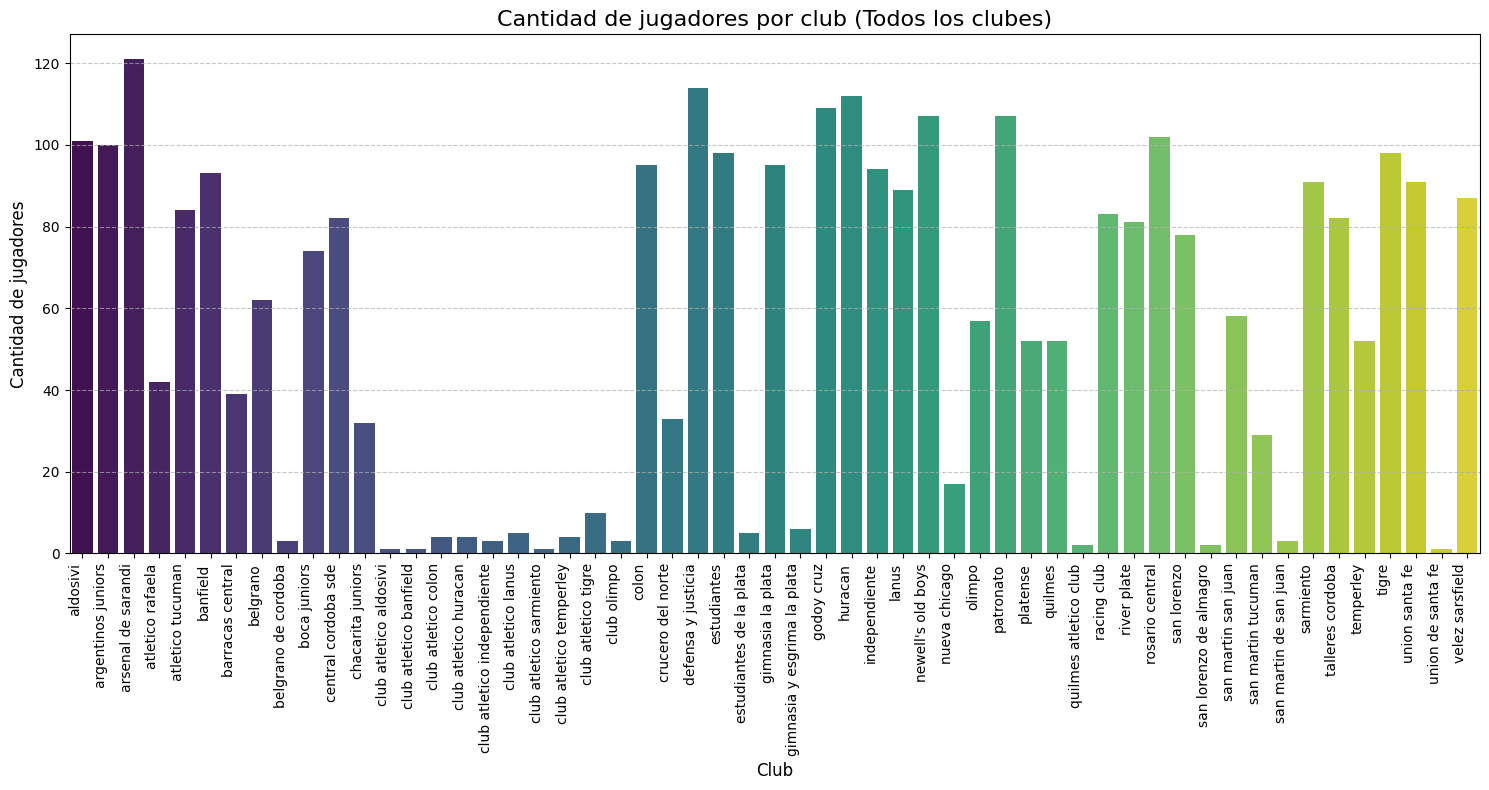

In [37]:
# Gráfico que muestra la cantidad de jugadores por equipo

plt.figure(figsize=(15, 8)) # Aumenta el tamaño para mejor visualización
club_counts_all = liga_argentina['club_name'].value_counts() # Considera todos los clubes

sns.barplot(x=club_counts_all.index, y=club_counts_all.values, palette="viridis")

plt.title("Cantidad de jugadores por club (Todos los clubes)", fontsize=16)
plt.xlabel("Club", fontsize=12)
plt.ylabel("Cantidad de jugadores", fontsize=12)
plt.xticks(rotation=90, ha='right', fontsize=10) # Rota las etiquetas del eje X
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout() # Ajusta el diseño para evitar solapamiento
plt.show()

C:\Users\rocio\AppData\Local\Temp\ipykernel_3028\3873140036.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='preferred_foot', data=liga_argentina, palette='viridis')


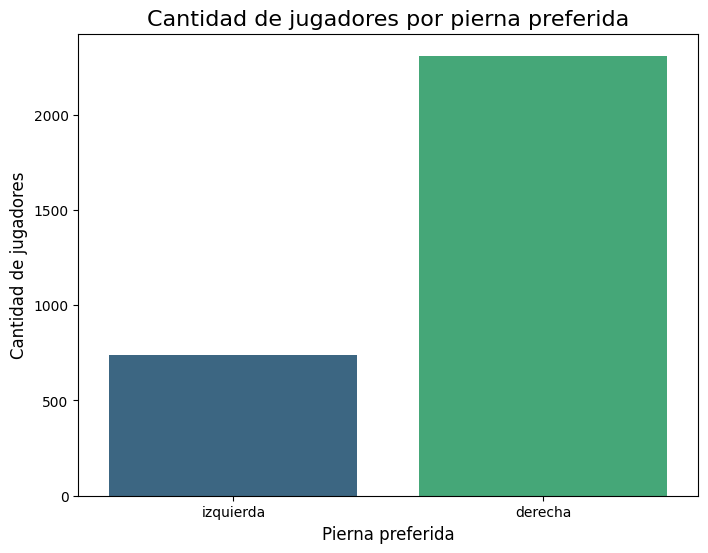

In [38]:
# Gráfico que muestra la cantidad de jugadores por pierna preferida
plt.figure(figsize=(8, 6))
sns.countplot(x='preferred_foot', data=liga_argentina, palette='viridis')
plt.title('Cantidad de jugadores por pierna preferida', fontsize=16)
plt.xlabel('Pierna preferida', fontsize=12)
plt.ylabel('Cantidad de jugadores', fontsize=12)
plt.show()

C:\Users\rocio\AppData\Local\Temp\ipykernel_3028\860927144.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=nationality_counts.values, y=nationality_counts.index, palette='viridis')


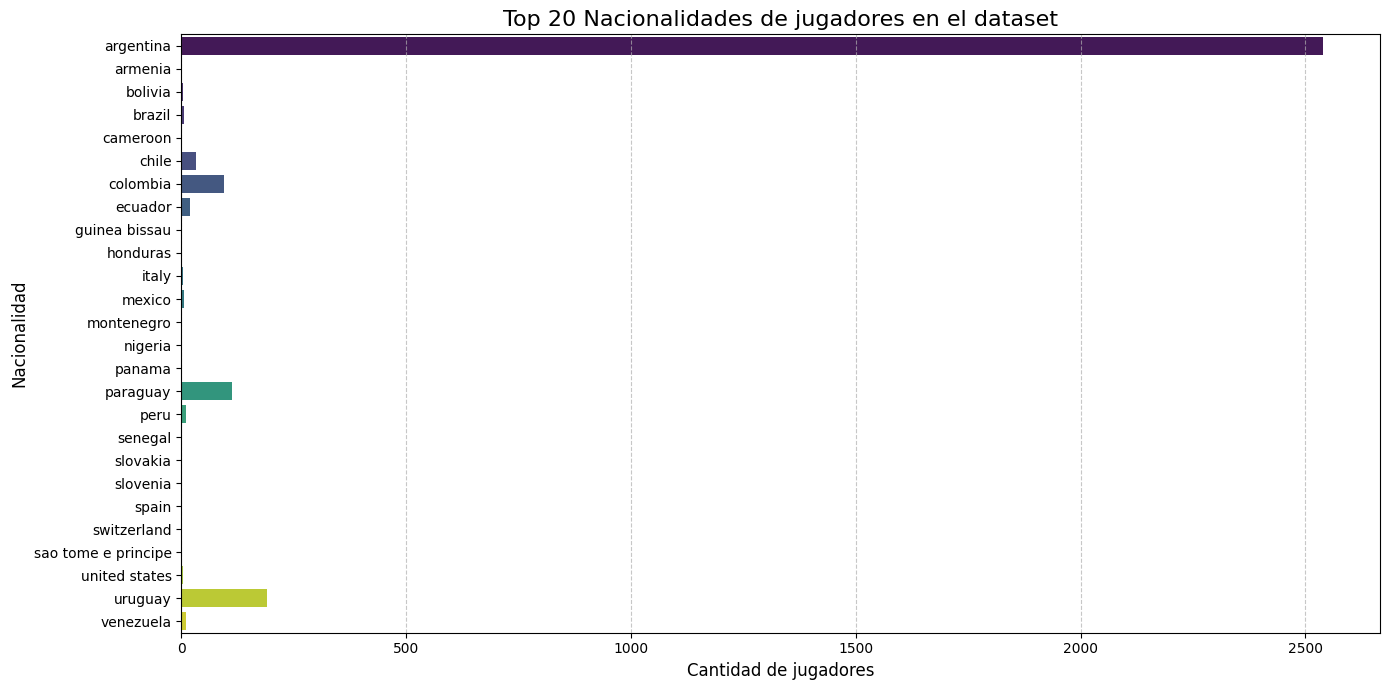

In [39]:
# Gráfico que muestra la cantidad de jugadores por nacionalidad
plt.figure(figsize=(14, 7))
nationality_counts = liga_argentina['nationality_name'].value_counts().head(20) # Top 20 nacionalidades

sns.barplot(x=nationality_counts.values, y=nationality_counts.index, palette='viridis')
plt.title('Top 20 Nacionalidades de jugadores en el dataset', fontsize=16)
plt.xlabel('Cantidad de jugadores', fontsize=12)
plt.ylabel('Nacionalidad', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# La mayoría de los jugadores son Argentinos, por ende podemos decir que este gráfico nos sirve para que, cuando entrenemos las preguntas, no usemos la pregunta "De qué nacionalidad es x jugador?" Porque va a tender a decir argentina (?)

### Tranformacion de datos

In [ ]:
liga_argentina.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3051 entries, 429 to 9949815
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   long_name             3051 non-null   object 
 1   player_positions      3051 non-null   object 
 2   dob                   3051 non-null   object 
 3   height_cm             3051 non-null   int64  
 4   weight_kg             3051 non-null   int64  
 5   league_name           3051 non-null   object 
 6   league_level          3051 non-null   float64
 7   club_name             3051 non-null   object 
 8   club_position         3051 non-null   object 
 9   club_jersey_number    3051 non-null   float64
 10  nationality_name      3051 non-null   object 
 11  nation_position       32 non-null     object 
 12  nation_jersey_number  32 non-null     float64
 13  preferred_foot        3051 non-null   object 
dtypes: float64(3), int64(2), object(9)
memory usage: 357.5+ KB


In [22]:
# Transformacion de tipos de datos
int1_cols = ['height_cm', 'weight_kg']
str_cols = ['long_name', 'player_positions']
datetime_cols = ['dob']
category_cols = ['league_name', 'club_name', 'club_position', 'nationality_name', 'nation_position', 'preferred_foot']
int_cols = ['league_level', 'club_jersey_number', 'nation_jersey_number']

# Convertir a int
for col in int1_cols:
    liga_argentina[col] = liga_argentina[col].astype('Int64')

# Convertir a string
for col in str_cols:
    liga_argentina[col] = liga_argentina[col].astype('str')

# Convertir a datetime
for col in datetime_cols:
    liga_argentina[col] = pd.to_datetime(liga_argentina[col], errors='coerce')

# Convertir a category
for col in category_cols:
    liga_argentina[col] = liga_argentina[col].astype('category')

# Convertir a Int64 (nullable integer)
for col in int_cols:
    liga_argentina[col] = liga_argentina[col].astype('Int64')

liga_argentina.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3051 entries, 429 to 9949815
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   long_name             3051 non-null   object        
 1   player_positions      3051 non-null   object        
 2   dob                   3051 non-null   datetime64[ns]
 3   height_cm             3051 non-null   Int64         
 4   weight_kg             3051 non-null   Int64         
 5   league_name           3051 non-null   category      
 6   league_level          3051 non-null   Int64         
 7   club_name             3051 non-null   category      
 8   club_position         3051 non-null   category      
 9   club_jersey_number    3051 non-null   Int64         
 10  nationality_name      3051 non-null   category      
 11  nation_position       32 non-null     category      
 12  nation_jersey_number  32 non-null     Int64         
 13  preferred_foot    

In [23]:
# Verificacion de nulos
liga_argentina.isnull().sum()

long_name                  0
player_positions           0
dob                        0
height_cm                  0
weight_kg                  0
league_name                0
league_level               0
club_name                  0
club_position              0
club_jersey_number         0
nationality_name           0
nation_position         3019
nation_jersey_number    3019
preferred_foot             0
dtype: int64

In [ ]:
# Divide las posiciones de juego del player_position por coma y quita espacios (guardado en un array)
# Va a ser util para el diccionario de posiciones
liga_argentina['player_positions'] = liga_argentina['player_positions'].fillna('').str.split(', ')
liga_argentina.head()

,long_name,player_positions,dob,height_cm,weight_kg,league_name,league_level,club_name,club_position,club_jersey_number,nationality_name,nation_position,nation_jersey_number,preferred_foot
429,Ignacio Martín Fernández,"[CM, CAM]",1990-01-12,182,67,Liga Profesional,1,River Plate,CAM,10,Argentina,NaN,<NA>,Left
570,Franco Armani,[GK],1986-10-16,189,88,Liga Profesional,1,River Plate,GK,1,Argentina,SUB,1,Right
596,Agustín Daniel Rossi,[GK],1995-08-21,195,95,Liga Profesional,1,Boca Juniors,GK,1,Argentina,NaN,<NA>,Right
684,Enzo Nicolás Pérez,"[CDM, CM]",1986-02-22,178,77,Liga Profesional,1,River Plate,CDM,24,Argentina,NaN,<NA>,Right
698,Faustino Marcos Alberto Rojo,[CB],1990-03-20,186,82,Liga Profesional,1,Boca Juniors,SUB,6,Argentina,NaN,<NA>,Left


In [25]:
# Diccionario de abreviaciones a descripciones en español
posiciones_fifa = {
    "GK": "Arquero",
    "ST": "Delantero",
    "CF": "Delantero Centro",
    "LF": "Delantero Izquierdo",
    "RF": "Delantero Derecho",
    "LS": "Delantero Izquierdo",
    "RS": "Delantero Derecho",
    "LW": "Extremo Izquierdo",
    "RW": "Extremo Derecho",
    "CAM": "Mediocampista Ofensivo",
    "CM": "Mediocampista Central",
    "CDM": "Mediocampista Defensivo",
    "LAM": "Mediocampista Izquierdo Ofensivo",
    "RAM": "Mediocampista Derecho Ofensivo",
    "LCM": "Mediocentro Izquierdo",
    "RCM": "Mediocentro Derecho",
    "LM": "Mediocampista Izquierdo",
    "RM": "Mediocampista Derecho",
    "LDM": "Mediocampista Defensivo Izquierdo",
    "RDM": "Mediocampista Defensivo Derecho",
    "LB": "Lateral Izquierdo",
    "RB": "Lateral Derecho",
    "LCB": "Defensor Central Izquierdo",
    "RCB": "Defensor Central Derecho",
    "CB": "Defensor Central",
    "LWB": "Carrilero Izquierdo",
    "RWB": "Carrilero Derecho",
    "SUB": "Suplente",
    "RES": "Reserva",
    "No Convocado": "No Convocado"
}

In [ ]:
# Crea una nueva columna con las descripciones traducidas de players_positions
liga_argentina['player_positions_desc'] = liga_argentina['player_positions'].apply(
    lambda posiciones: [posiciones_fifa.get(pos.strip(), f"Desconocida ({pos})") for pos in posiciones]
)
liga_argentina.head()

,long_name,player_positions,dob,height_cm,weight_kg,league_name,league_level,club_name,club_position,club_jersey_number,nationality_name,nation_position,nation_jersey_number,preferred_foot,player_positions_desc
429,Ignacio Martín Fernández,"[CM, CAM]",1990-01-12,182,67,Liga Profesional,1,River Plate,CAM,10,Argentina,NaN,<NA>,Left,"[Mediocampista Central, Mediocampista Ofensivo]"
570,Franco Armani,[GK],1986-10-16,189,88,Liga Profesional,1,River Plate,GK,1,Argentina,SUB,1,Right,[Arquero]
596,Agustín Daniel Rossi,[GK],1995-08-21,195,95,Liga Profesional,1,Boca Juniors,GK,1,Argentina,NaN,<NA>,Right,[Arquero]
684,Enzo Nicolás Pérez,"[CDM, CM]",1986-02-22,178,77,Liga Profesional,1,River Plate,CDM,24,Argentina,NaN,<NA>,Right,"[Mediocampista Defensivo, Mediocampista Central]"
698,Faustino Marcos Alberto Rojo,[CB],1990-03-20,186,82,Liga Profesional,1,Boca Juniors,SUB,6,Argentina,NaN,<NA>,Left,[Defensor Central]


In [27]:
# Crea una nueva columna con las descripciones traducidas de club_position
liga_argentina['club_position_desc'] = liga_argentina['club_position'].astype(str).apply(
    lambda x: posiciones_fifa.get(x, f'Desconocida ({x})')
)
liga_argentina.head()

,long_name,player_positions,dob,height_cm,weight_kg,league_name,league_level,club_name,club_position,club_jersey_number,nationality_name,nation_position,nation_jersey_number,preferred_foot,player_positions_desc,club_position_desc
429,Ignacio Martín Fernández,"[CM, CAM]",1990-01-12,182,67,Liga Profesional,1,River Plate,CAM,10,Argentina,NaN,<NA>,Left,"[Mediocampista Central, Mediocampista Ofensivo]",Mediocampista Ofensivo
570,Franco Armani,[GK],1986-10-16,189,88,Liga Profesional,1,River Plate,GK,1,Argentina,SUB,1,Right,[Arquero],Arquero
596,Agustín Daniel Rossi,[GK],1995-08-21,195,95,Liga Profesional,1,Boca Juniors,GK,1,Argentina,NaN,<NA>,Right,[Arquero],Arquero
684,Enzo Nicolás Pérez,"[CDM, CM]",1986-02-22,178,77,Liga Profesional,1,River Plate,CDM,24,Argentina,NaN,<NA>,Right,"[Mediocampista Defensivo, Mediocampista Central]",Mediocampista Defensivo
698,Faustino Marcos Alberto Rojo,[CB],1990-03-20,186,82,Liga Profesional,1,Boca Juniors,SUB,6,Argentina,NaN,<NA>,Left,[Defensor Central],Suplente


In [28]:
# Agregar categoría "No Convocado" a la columna nation_position para los que no se encuentran convocados en la seleccion
liga_argentina['nation_position'] = liga_argentina['nation_position'].cat.add_categories(['No Convocado'])

# Reemplazamos NaN por "No Convocado"
liga_argentina['nation_position'] = liga_argentina['nation_position'].fillna('No Convocado')

In [29]:
# Crea una nueva columna con las descripciones traducidas de nation_position
liga_argentina['nation_position_desc'] = liga_argentina['nation_position'].astype(str).apply(
    lambda x: posiciones_fifa.get(x, f'Desconocida ({x})')
)
liga_argentina.head()

,long_name,player_positions,dob,height_cm,weight_kg,league_name,league_level,club_name,club_position,club_jersey_number,nationality_name,nation_position,nation_jersey_number,preferred_foot,player_positions_desc,club_position_desc,nation_position_desc
429,Ignacio Martín Fernández,"[CM, CAM]",1990-01-12,182,67,Liga Profesional,1,River Plate,CAM,10,Argentina,No Convocado,<NA>,Left,"[Mediocampista Central, Mediocampista Ofensivo]",Mediocampista Ofensivo,No Convocado
570,Franco Armani,[GK],1986-10-16,189,88,Liga Profesional,1,River Plate,GK,1,Argentina,SUB,1,Right,[Arquero],Arquero,Suplente
596,Agustín Daniel Rossi,[GK],1995-08-21,195,95,Liga Profesional,1,Boca Juniors,GK,1,Argentina,No Convocado,<NA>,Right,[Arquero],Arquero,No Convocado
684,Enzo Nicolás Pérez,"[CDM, CM]",1986-02-22,178,77,Liga Profesional,1,River Plate,CDM,24,Argentina,No Convocado,<NA>,Right,"[Mediocampista Defensivo, Mediocampista Central]",Mediocampista Defensivo,No Convocado
698,Faustino Marcos Alberto Rojo,[CB],1990-03-20,186,82,Liga Profesional,1,Boca Juniors,SUB,6,Argentina,No Convocado,<NA>,Left,[Defensor Central],Suplente,No Convocado


In [30]:
# Imputamos un numero alto para identificar que no esta convocado el jugador a la seleccion de su pais
liga_argentina['nation_jersey_number'] = liga_argentina['nation_jersey_number'].fillna(99)
liga_argentina.head()

,long_name,player_positions,dob,height_cm,weight_kg,league_name,league_level,club_name,club_position,club_jersey_number,nationality_name,nation_position,nation_jersey_number,preferred_foot,player_positions_desc,club_position_desc,nation_position_desc
429,Ignacio Martín Fernández,"[CM, CAM]",1990-01-12,182,67,Liga Profesional,1,River Plate,CAM,10,Argentina,No Convocado,99,Left,"[Mediocampista Central, Mediocampista Ofensivo]",Mediocampista Ofensivo,No Convocado
570,Franco Armani,[GK],1986-10-16,189,88,Liga Profesional,1,River Plate,GK,1,Argentina,SUB,1,Right,[Arquero],Arquero,Suplente
596,Agustín Daniel Rossi,[GK],1995-08-21,195,95,Liga Profesional,1,Boca Juniors,GK,1,Argentina,No Convocado,99,Right,[Arquero],Arquero,No Convocado
684,Enzo Nicolás Pérez,"[CDM, CM]",1986-02-22,178,77,Liga Profesional,1,River Plate,CDM,24,Argentina,No Convocado,99,Right,"[Mediocampista Defensivo, Mediocampista Central]",Mediocampista Defensivo,No Convocado
698,Faustino Marcos Alberto Rojo,[CB],1990-03-20,186,82,Liga Profesional,1,Boca Juniors,SUB,6,Argentina,No Convocado,99,Left,[Defensor Central],Suplente,No Convocado


In [31]:
# Eliminamos las columnas repetidas en inglés para quedarnos con sus descripciones
liga_argentina.drop(columns=['player_positions', 'club_position', 'nation_position'], inplace=True)

In [32]:
# Diccionario de traducción
foot_trad = {
    'Right': 'Derecha',
    'Left': 'Izquierda'
}

# Aplicar la traducción
liga_argentina['preferred_foot'] = liga_argentina['preferred_foot'].map(foot_trad)
liga_argentina.head()

,long_name,dob,height_cm,weight_kg,league_name,league_level,club_name,club_jersey_number,nationality_name,nation_jersey_number,preferred_foot,player_positions_desc,club_position_desc,nation_position_desc
429,Ignacio Martín Fernández,1990-01-12,182,67,Liga Profesional,1,River Plate,10,Argentina,99,Izquierda,"[Mediocampista Central, Mediocampista Ofensivo]",Mediocampista Ofensivo,No Convocado
570,Franco Armani,1986-10-16,189,88,Liga Profesional,1,River Plate,1,Argentina,1,Derecha,[Arquero],Arquero,Suplente
596,Agustín Daniel Rossi,1995-08-21,195,95,Liga Profesional,1,Boca Juniors,1,Argentina,99,Derecha,[Arquero],Arquero,No Convocado
684,Enzo Nicolás Pérez,1986-02-22,178,77,Liga Profesional,1,River Plate,24,Argentina,99,Derecha,"[Mediocampista Defensivo, Mediocampista Central]",Mediocampista Defensivo,No Convocado
698,Faustino Marcos Alberto Rojo,1990-03-20,186,82,Liga Profesional,1,Boca Juniors,6,Argentina,99,Izquierda,[Defensor Central],Suplente,No Convocado


In [33]:
# Se necesita eliminar los corchetes de las posiciones de juego
def limpiar_corchetes(text):
    if isinstance(text, list):
        return ", ".join(text)
    if isinstance(text, str) and text.startswith("[") and text.endswith("]"):
        return text.strip("[]").replace("'", "").replace('"', '')
    return text

In [34]:
# Aplicamos la funcion de limpiar corchetes a la columna player_positions_
liga_argentina['player_positions_desc'] = liga_argentina['player_positions_desc'].apply(limpiar_corchetes)
liga_argentina.head()

,long_name,dob,height_cm,weight_kg,league_name,league_level,club_name,club_jersey_number,nationality_name,nation_jersey_number,preferred_foot,player_positions_desc,club_position_desc,nation_position_desc
429,Ignacio Martín Fernández,1990-01-12,182,67,Liga Profesional,1,River Plate,10,Argentina,99,Izquierda,"Mediocampista Central, Mediocampista Ofensivo",Mediocampista Ofensivo,No Convocado
570,Franco Armani,1986-10-16,189,88,Liga Profesional,1,River Plate,1,Argentina,1,Derecha,Arquero,Arquero,Suplente
596,Agustín Daniel Rossi,1995-08-21,195,95,Liga Profesional,1,Boca Juniors,1,Argentina,99,Derecha,Arquero,Arquero,No Convocado
684,Enzo Nicolás Pérez,1986-02-22,178,77,Liga Profesional,1,River Plate,24,Argentina,99,Derecha,"Mediocampista Defensivo, Mediocampista Central",Mediocampista Defensivo,No Convocado
698,Faustino Marcos Alberto Rojo,1990-03-20,186,82,Liga Profesional,1,Boca Juniors,6,Argentina,99,Izquierda,Defensor Central,Suplente,No Convocado


In [ ]:
# Normalización de datos

def normalizar_texto(texto):
    if isinstance(texto, list):
        # Normaliza cada posición en la lista
        return [normalizar_texto(pos) for pos in texto]
    elif pd.isna(texto) or texto == "":
        # Retorna una lista vacía o maneja de alguna otra forma los NaN/vacíos si es necesario
        return []
    elif pd.isna(texto):
        return ""
    texto = str(texto).lower()  # para pasarlo a minúsculas
    texto = unicodedata.normalize('NFD', texto).encode('ascii', 'ignore').decode('utf-8')  # para descomponer caracteres especiales y borrar tildes
    return texto.strip()  # borrar espacios que estén al comienzo y al final

cols_a_normalizar = [
    'long_name',
    'league_name',
    'club_name',
    'nationality_name',
    'preferred_foot',
    'player_positions_desc',
    'club_position_desc',
    'nation_position_desc'
]

for col in cols_a_normalizar:
    liga_argentina[col] = liga_argentina[col].apply(normalizar_texto)
liga_argentina.head()

,long_name,dob,height_cm,weight_kg,league_name,league_level,club_name,club_jersey_number,nationality_name,nation_jersey_number,preferred_foot,player_positions_desc,club_position_desc,nation_position_desc
429,ignacio martin fernandez,1990-01-12,182,67,liga profesional,1,river plate,10,argentina,99,izquierda,"mediocampista central, mediocampista ofensivo",mediocampista ofensivo,no convocado
570,franco armani,1986-10-16,189,88,liga profesional,1,river plate,1,argentina,1,derecha,arquero,arquero,suplente
596,agustin daniel rossi,1995-08-21,195,95,liga profesional,1,boca juniors,1,argentina,99,derecha,arquero,arquero,no convocado
684,enzo nicolas perez,1986-02-22,178,77,liga profesional,1,river plate,24,argentina,99,derecha,"mediocampista defensivo, mediocampista central",mediocampista defensivo,no convocado
698,faustino marcos alberto rojo,1990-03-20,186,82,liga profesional,1,boca juniors,6,argentina,99,izquierda,defensor central,suplente,no convocado


In [36]:
liga_argentina.to_csv("liga_argentina_model.csv", index=False)

### Visualizaciones Finales

C:\Users\rocio\AppData\Local\Temp\ipykernel_3028\116836743.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=grupo_posicion_counts.index, y=grupo_posicion_counts.values, palette="viridis")


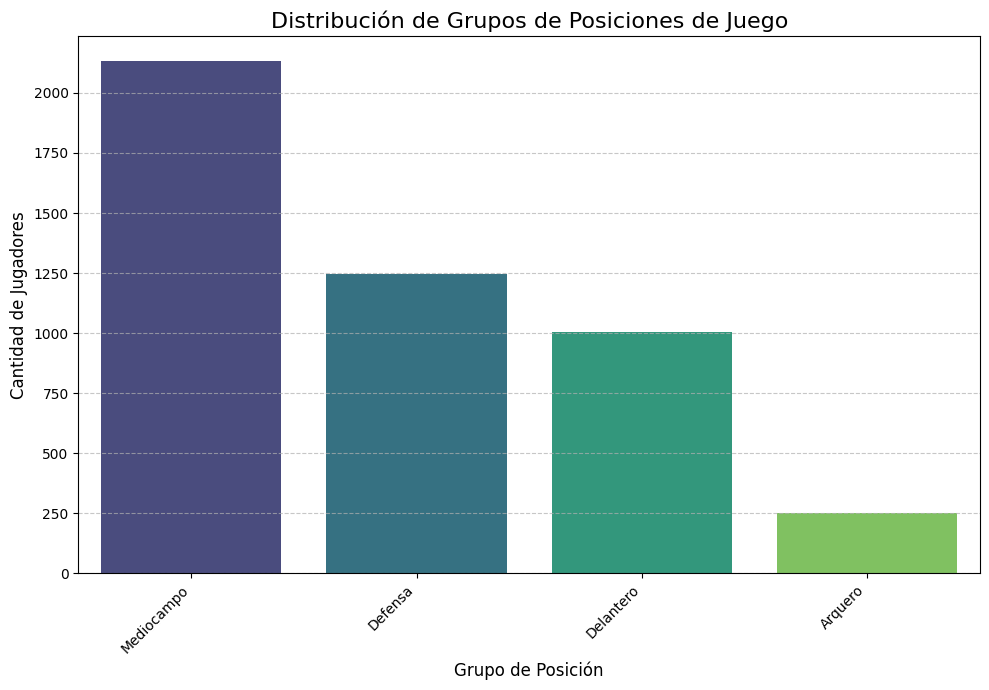

C:\Users\rocio\AppData\Local\Temp\ipykernel_3028\116836743.py:50: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=posiciones_top.values, y=posiciones_top.index, palette="viridis")


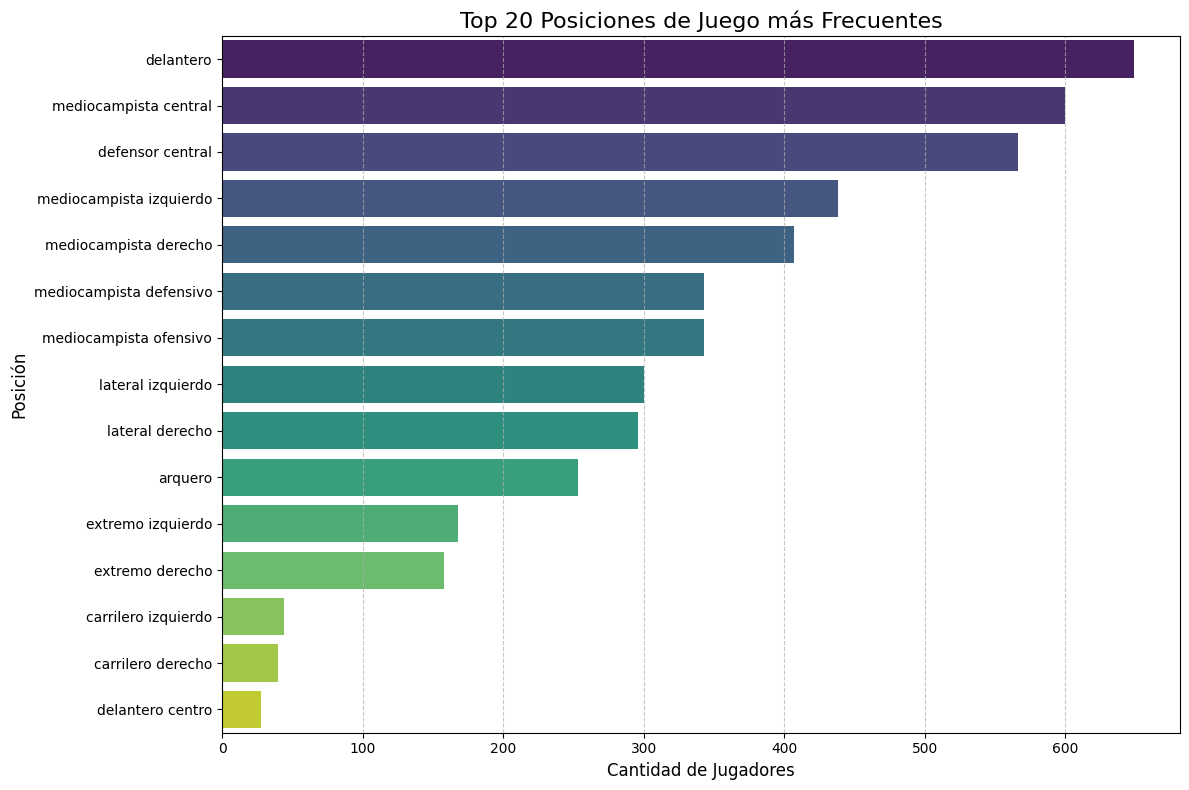

In [42]:
# Gráfico para ver la cantidad de jugadores por posición
# Preparar datos para el gráfico de posiciones de juego
# Primero, expandimos la columna player_positions_trans para tener una fila por cada posición
posiciones_expandidas = liga_argentina['player_positions_desc'].str.split(', ', expand=True).stack().reset_index(level=1, drop=True).to_frame('posicion_expandida')

# Unir con el DataFrame original para obtener las filas completas
df_posiciones_expandidas = liga_argentina.drop('player_positions_desc', axis=1).join(posiciones_expandidas)

# Contar la frecuencia de cada posición
posicion_counts = df_posiciones_expandidas['posicion_expandida'].value_counts()

# Diccionario para agrupar posiciones (simplificación)
grupos_posiciones = {
    'Arquero': ['arquero'],
    'Defensa': ['lateral izquierdo', 'lateral derecho', 'defensor central izquierdo', 'defensor central derecho', 'defensor central', 'carrilero izquierdo', 'carrilero derecho'],
    'Mediocampo': ['mediocampista ofensivo', 'mediocampista central', 'mediocampista defensivo', 'mediocampista izquierdo ofensivo', 'mediocampista derecho ofensivo', 'mediocentro izquierdo', 'mediocentro derecho', 'mediocampista izquierdo', 'mediocampista derecho', 'mediocampista defensivo izquierdo', 'mediocampista defensivo derecho'],
    'Delantero': ['delantero', 'delantero centro', 'delantero izquierdo', 'delantero derecho', 'extremo izquierdo', 'extremo derecho'],
    'Otros': ['suplente', 'reserva', 'no convocado', 'desconocida (nan)']
}

# Crear una nueva columna con las posiciones agrupadas
def agrupar_posicion(posicion):
    for grupo, posiciones_list in grupos_posiciones.items():
        if posicion in posiciones_list:
            return grupo
    return 'Otros' # Por si acaso alguna posición no está mapeada

df_posiciones_expandidas['grupo_posicion'] = df_posiciones_expandidas['posicion_expandida'].apply(agrupar_posicion)

# Contar la frecuencia de las posiciones agrupadas
grupo_posicion_counts = df_posiciones_expandidas['grupo_posicion'].value_counts()

# Gráfico de barras de las posiciones agrupadas
plt.figure(figsize=(10, 7))
sns.barplot(x=grupo_posicion_counts.index, y=grupo_posicion_counts.values, palette="viridis")
plt.title('Distribución de Grupos de Posiciones de Juego', fontsize=16)
plt.xlabel('Grupo de Posición', fontsize=12)
plt.ylabel('Cantidad de Jugadores', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Opcional: Gráfico de barras de las posiciones más detalladas (Top N)
# Puedes ajustar N para ver más o menos posiciones
n_top_positions = 20
posiciones_top = posicion_counts.head(n_top_positions)

plt.figure(figsize=(12, 8))
sns.barplot(x=posiciones_top.values, y=posiciones_top.index, palette="viridis")
plt.title(f'Top {n_top_positions} Posiciones de Juego más Frecuentes', fontsize=16)
plt.xlabel('Cantidad de Jugadores', fontsize=12)
plt.ylabel('Posición', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()